# Joined Assignment Team 1

Introduction:

Flora is an online retailer of decorative household items. We were given access to one-year (Dec’ 10 to Dec’ 11) sales data to build a classification algorithm that effectively classifies their current customer as either a wholesaler or personal buyer. The resulting algorithm, built using the KNN Classifier method, was able to classify their data with 87% accuracy.

Method:

Our approach can be summarized in 4 steps
1.	Data Creation and Feature Engineering – Using MySQL to create our modelling dataset, analyzing the given data, and imputing any missing values
2.	Preparing for Model Development – Splitting dataset into training and testing sets
3.	Model Development – Experimenting with different model types 
4.	Finalizing the Candidate Model – Selecting the model with the highest predicting capabilities

Using Entity Relationship Diagram (ERD) our team studied the relationship between different tables and fields. This allowed us to take a structured approach to designing our modeling dataset. As a result, we were able to take the leanest path while simultaneously preventing the creation of any cartesian product.
The approach we took was to build two separate subqueries. One subquery connected all the customer related data together and the other subquery connected all the invoice related information together. Finally, both these subqueries were joined together keeping the invoice subquery as the primary table. Additionally, we imputed the missing values under the different categorical variables with ‘Unknown’ as these data could have been voluntarily or involuntarily missed out during data collection. 
The resulting database (4055 observations) was then exported to Python for additional data wrangling. 

In [55]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf # linear regression (statsmodels)
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# importing the file into colab
cus_data = pd.read_csv('./Customer_database.csv') # Dataset is now stored in a Pandas Dataframe

# # specifying file name
#file = './Customer_database.csv'


# # reading the file into Python
#cus_data = pd.read_csv(file)

# Dropping customer_id and total_spent
cus_data   = cus_data.drop(['customer_id','total_spent'],
                               axis = 1)

# outputting the first ten rows of the dataset
cus_data.head(n = 5)

,occupation,employment_type,education,completed_years_of_education,marital_status,relationship_in_household,race,country,quantity,age,type_of_client
0,Sales,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,White,United-States,138,48,NaN
1,Exec-managerial,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,436,43,NaN
2,Exec-managerial,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,1711,44,Wholesaler
3,Machine-op-inspct,Private,7th-8th,4,Divorced,Not-in-family,White,United-States,46,45,Personal
4,Adm-clerical,Private,HS-grad,9,Married-civ-spouse,Wife,White,United-States,19,50,NaN


In [4]:
cus_data.describe()

,completed_years_of_education,quantity,age
count,4055.000000,4055.000000,4055.000000
mean,10.076942,515.713933,38.917879
std,2.546557,3031.332726,13.674070
min,1.000000,-904.000000,17.000000
25%,9.000000,50.000000,28.000000
50%,10.000000,129.000000,37.000000
75%,12.000000,330.000000,48.000000
max,16.000000,110540.000000,91.000000


Preparing for Model Development

Starting with the creation of dummy variables for categorical fields and dividing the data into labeled and unlabeled data where, labeled data (1021 observations) are those with pre-existing classification of client and unlabeled data (3034 unlabeled) where this classification was missing. This step was pivotal in maintaining the data integrity of the original dataset and for addressing factors like multicollinearity. 


In [5]:
# creating dummies variables 
cus_data_dummies = pd.get_dummies(cus_data)
 
 # checking the data
cus_data_dummies.head(n=5)


,completed_years_of_education,quantity,age,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia,type_of_client_Personal,type_of_client_Wholesaler
0,13,138,48,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,13,436,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,13,1711,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,4,46,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,9,19,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [6]:
import numpy as np

# Creating dummy variables and adding a new column to verify if it is labeled or not 
cus_data_dummies['Label'] = np.where((cus_data_dummies['type_of_client_Personal'] + 
                                      cus_data_dummies['type_of_client_Wholesaler'])== 0, 'F', 'T')

cus_data_dummies.head(n=10)

,completed_years_of_education,quantity,age,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia,type_of_client_Personal,type_of_client_Wholesaler,Label
0,13,138,48,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,F
1,13,436,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,F
2,13,1711,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T
3,4,46,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,T
4,9,19,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,F
5,9,414,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,F
6,10,162,43,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T
7,9,177,26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T
8,10,9,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,

In [7]:
# Splitting the data in labeled and not labeled

# Labeled data
label_data_dummies = cus_data_dummies[cus_data_dummies['Label']=='T']

label_data_dummies.head(n=5)

,completed_years_of_education,quantity,age,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia,type_of_client_Personal,type_of_client_Wholesaler,Label
2,13,1711,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T
3,4,46,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,T
6,10,162,43,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T
7,9,177,26,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T
11,13,266,26,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T


In [8]:
# Describing the label data
label_data_dummies.describe()

,completed_years_of_education,quantity,age,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia,type_of_client_Personal,type_of_client_Wholesaler
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.0,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000,1021.000000,1021.0,1021.0,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.0,1021.000000,1021.000000
mean,10.137120,675.226249,38.857982,0.126347,0.0,0.118511,0.12047,0.023506,0.047013,0.074437,0.089128,0.001959,0.121450,0.012733,0.113614,0.028404,0.051910,0.070519,0.024486,0.067581,0.687561,0.036239,0.077375,0.036239,0.070519,0.0,0.019589,0.039177,0.013712,0.001959,0.005877,0.025465,0.015671,0.029383,0.044074,0.171401,0.009794,0.329089,0.056807,0.000979,0.01665,0.220372,0.131244,0.000979,0.475024,0.008815,0.324192,0.033301,0.026445,0.426053,0.240940,0.026445,0.148874,0.109696,0.047992,0.011753,0.030362,0.101861,0.004897,0.851126,0.0,0.000979,0.004897,0.000979,0.002938,0.000979,0.000979,0.0,0.004897,0.0,0.004897,0.001959,0.001959,0.000979,0.0,0.0,0.001959,0.003918,

In [9]:
# Not Labeled data
nolabel_data_dummies = cus_data_dummies[cus_data_dummies['Label']=='F']

# Dropping varibles that are not needed
nolabel_data_dummies = nolabel_data_dummies.drop(['type_of_client_Personal','type_of_client_Wholesaler','Label'],
                               axis = 1)

nolabel_data_dummies.head(n=5)

,completed_years_of_education,quantity,age,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia
0,13,138,48,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,13,436,43,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,9,19,50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,9,414,33,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,10,9,21,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [10]:
# Describing not labeled data
nolabel_data_dummies.describe()

,completed_years_of_education,quantity,age,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia
count,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.00000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000
mean,10.056691,462.034937,38.938036,0.111074,0.000659,0.120633,0.123270,0.031312,0.035926,0.060646,0.104153,0.004285,0.125906,0.019776,0.120633,0.029005,0.048121,0.064601,0.028675,0.066249,0.690178,0.036585,0.075148,0.038233,0.064601,0.000330,0.029993,0.040541,0.009229,0.005603,0.010218,0.017469,0.015491,0.030653,0.041200,0.165788,0.012525,0.326632,0.049769,0.001978,0.017139,0.225775,0.142057,0.000989,0.445616,0.014832,0.331905,0.029664,0.034937,0.391562,0.267633,0.026697,0.15590,0.110415,0.047792,0.009558,0.029005,0.099209,0.005603,0.856625,0.000989,0.005603,0.002637,0.000989,0.002637,0.003296,0.000989,0.003955,0.002637,0.000659,0.004285,0.000989,0.001648,0.000659,0.000659

In [11]:
# Spliting cus_data_dummies dataset

# preparing explanatory variable data --- (x data)
labelled_data   = label_data_dummies.drop(['type_of_client_Personal','type_of_client_Wholesaler','Label'],
                               axis = 1)

# preparing response variables -- (y data)
label_target = label_data_dummies.loc[ : , 'type_of_client_Personal'] # 1 - Personal / 0 - Wholesaler 


# creating the testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(
    labelled_data,
    label_target,
    test_size = 0.25, 
    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (765, 100)
y-side: (765,)


Testing Data
------------
X-side: (256, 100)
y-side: (256,)



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# initiating model
logreg = LogisticRegression()

# fitting the model to training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 0 62  0  0  0  0]
 [ 0 92  0  0  0  0]
 [ 0 59  0  0  0  0]
 [ 0 11  0  0  0  0]
 [ 0 20  0  0  0  0]
 [ 0 12  0  0  0  0]]
              precision    recall  f1-score   support

          00       0.00      0.00      0.00        62
          01       0.36      1.00      0.53        92
          04       0.00      0.00      0.00        59
          10       0.00      0.00      0.00        11
          11       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        12

    accuracy                           0.36       256
   macro avg       0.06      0.17      0.09       256
weighted avg       0.13      0.36      0.19       256



/Users/lilialyssali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lilialyssali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lilialyssali/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [14]:
# Predicting based on unclassified data 

# running the model on the unclassified data
new_pred_log = logreg.predict(nolabel_data_dummies)

# saving the predicted results as dataframe
type_of_client_pred_log = pd.DataFrame(new_pred_log)

# reviewing the classification
type_of_client_pred_log.value_counts() # 1 - Personal / 0 - Wholesaler 


0    2890
1     144
dtype: int64

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       213
           1       0.67      0.47      0.55        43

    accuracy                           0.87       256
   macro avg       0.78      0.71      0.74       256
weighted avg       0.86      0.87      0.86       256



Text(0.5, 1.0, 'Confusion Matrix Testing Data')

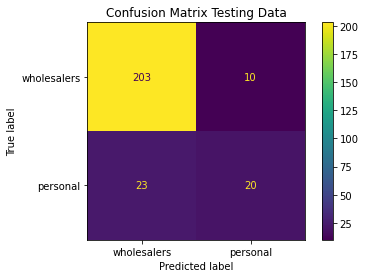

In [16]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# initiating the model
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model with the training data
knn.fit(X_train, y_train)

# predicting using testing data
y_pred = knn.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

# Confusion matrix for K-NN on testing data
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['wholesalers','personal'])
cmd.plot()
cmd.ax_.set_title('Confusion Matrix Testing Data')

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       628
           1       0.81      0.49      0.61       137

    accuracy                           0.89       765
   macro avg       0.85      0.73      0.77       765
weighted avg       0.88      0.89      0.88       765



Text(0.5, 1.0, 'Confusion Matrix Training Data')

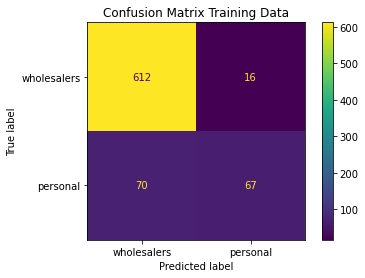

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicting using training data
y_pred = knn.predict(X_train)

# Printing the classification report
print(classification_report(y_train, y_pred))

# Confusion matrix for K-NN on training data
cm = confusion_matrix(y_train, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['wholesalers','personal'])
cmd.plot()
cmd.ax_.set_title('Confusion Matrix Training Data')

In [18]:
import pandas as pd

# Predicting unclassified data with K-NN
new_pred_knn = knn.predict(nolabel_data_dummies)

# saving the predicted results as dataframe
type_of_client_pred_knn = pd.DataFrame(new_pred_knn)

# reviewing the classification
type_of_client_pred_knn.value_counts() # 1 - Personal / 0 - Wholesaler 


0    2469
1     565
dtype: int64

Model Development

Multi iterations of two classifications models were attempted: a logistic regression and KNN Classifier. But ultimately it was the KNN model that predicted with an accuracy of ~87% and precision of ~90% (compared to the logistic model’s ~82% accuracy). Based on our research numbers seem to be on par with the industry standards.

We were cautious not to overfit our model. Therefore, we dropped any redundant or highly correlated fields from the parent table prior to creating dummies and our test/train data. Some fields dropped were straightforward such as customer_id, others took more time to notice, such as a duplication in total amount which was already considered by the model in terms of quantity sold. Based on the given data, the best resulting model was able to distinguish between a wholesaler or personal buyer with an accuracy of 87%.

Finalizing the Candidate Model
Upon testing both models on the unclassified data we noticed that the KNN model is more likely to classify customers as personal buyers than the logistics model. But in any case, most of the customers were wholesalers. But given the KNN model superior accuracy, lower False Positive (33.3% K-NN vs 71.4% GLM), and False Negative Rate (10.2% K-NN vs 16.5% GLM), we decided it would be our candidate model. The result of the predicted observations was that the unlabeled observations contain 2,469 Wholesalers and 565 Personal clients. The proportion of Wholesalers is 81.4% in the unlabeled data, very similar to the proportion of the labeled data (82.4%).


Number of Neighbors: 1
Train Accuracy: 1.0
Test Accuracy: 0.8
Difference of Accuracy: 0.2
     
Number of Neighbors: 2
Train Accuracy: 0.9
Test Accuracy: 0.87
Difference of Accuracy: 0.03
     
Number of Neighbors: 3
Train Accuracy: 0.9
Test Accuracy: 0.85
Difference of Accuracy: 0.05
     
Number of Neighbors: 4
Train Accuracy: 0.89
Test Accuracy: 0.88
Difference of Accuracy: 0.01
     
Number of Neighbors: 5
Train Accuracy: 0.89
Test Accuracy: 0.85
Difference of Accuracy: 0.04
     
Number of Neighbors: 6
Train Accuracy: 0.89
Test Accuracy: 0.88
Difference of Accuracy: 0.01
     
Number of Neighbors: 7
Train Accuracy: 0.88
Test Accuracy: 0.86
Difference of Accuracy: 0.02
     
Number of Neighbors: 8
Train Accuracy: 0.89
Test Accuracy: 0.87
Difference of Accuracy: 0.02
     
Number of Neighbors: 9
Train Accuracy: 0.89
Test Accuracy: 0.87
Difference of Accuracy: 0.02
     


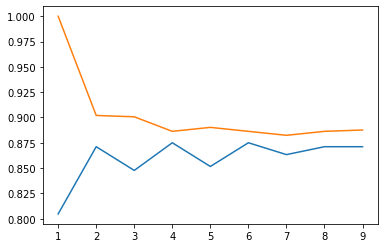

In [20]:
# Testing for different neighbors
neighbors = np.arange(1,10)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Function to iterate all the number of neighbors
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    print("Number of Neighbors:", k)
    print("Train Accuracy:",train_accuracy[i].round(decimals=2))
    print("Test Accuracy:",test_accuracy[i].round(decimals=2))
    print("Difference of Accuracy:", (train_accuracy[i] - 
                                     test_accuracy[i]).round(decimals=2))
    print("     ")

# Plotting the graph
plt.plot(neighbors, test_accuracy, label = 'Testing accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.show()

Number of Neighbors

For the K-NN model, we decided to select 9 neighbors to avoid overfitting.

In [2]:
########################################
# importing packages
########################################
import numpy                 as np  # mathematical essentials
import pandas                as pd  # data science essentials
import matplotlib.pyplot     as plt # fundamental data visualization
import seaborn               as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

In [3]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [119]:
customer_df = pd.read_csv('/Users/lilialyssali/Downloads/flora_2 (1).csv')
customer_df.head(n = 5)

,customer_id,occupation,employment_type,education,completed_years_of_education,marital_status,relationship_in_household,race,country,avg_quantity,total_quantity,avd_spent,total_spent,number_of_orders,age,type_of_client
0,1144084,Sales,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,White,United-States,3.4500,138,6.763500,270.54,40,48,NaN
1,1504001,Exec-managerial,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,4.5417,436,11.743021,1127.33,96,44,NaN
2,1525178,Exec-managerial,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,4.0641,1711,11.023895,4641.06,421,44,Wholesaler
3,1773036,Machine-op-inspct,Private,7th-8th,4,Divorced,Not-in-family,White,United-States,1.7037,46,2.918148,78.79,27,46,Personal
4,2276568,Adm-clerical,Private,HS-grad,9,Married-civ-spouse,Wife,White,United-States,3.8000,19,26.920000,134.60,5,50,NaN


In [40]:
# using unsupervised learning model by subsetting type_of_client to NaN
# customer = customer_df[customer_df['type_of_client'].isnull()]
# customer.head(n = 5)

In [120]:
# customer_df['weighted_price'] = customer_df['total_spent'] / (customer_df['total_quantity'] + 0.000001)
customer_df.head(n = 5)

,customer_id,occupation,employment_type,education,completed_years_of_education,marital_status,relationship_in_household,race,country,avg_quantity,total_quantity,avd_spent,total_spent,number_of_orders,age,type_of_client
0,1144084,Sales,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Husband,White,United-States,3.4500,138,6.763500,270.54,40,48,NaN
1,1504001,Exec-managerial,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,4.5417,436,11.743021,1127.33,96,44,NaN
2,1525178,Exec-managerial,Private,Bachelors,13,Married-civ-spouse,Husband,White,United-States,4.0641,1711,11.023895,4641.06,421,44,Wholesaler
3,1773036,Machine-op-inspct,Private,7th-8th,4,Divorced,Not-in-family,White,United-States,1.7037,46,2.918148,78.79,27,46,Personal
4,2276568,Adm-clerical,Private,HS-grad,9,Married-civ-spouse,Wife,White,United-States,3.8000,19,26.920000,134.60,5,50,NaN


In [133]:
customer_df.describe().round(decimals = 2)

,customer_id,completed_years_of_education,avg_quantity,total_quantity,avd_spent,total_spent,number_of_orders,age
count,4.055000e+03,4055.00,4055.00,4055.00,4055.00,4055.00,4055.00,4055.00
mean,2.139716e+09,10.08,33.73,515.71,35.78,986.44,79.99,38.98
std,1.252294e+09,2.55,1185.89,3031.33,1230.09,5304.29,192.68,13.68
min,1.144084e+06,1.00,-250.00,-904.00,-9646.95,-38587.80,1.00,17.00
25%,1.051253e+09,9.00,2.36,50.00,5.59,140.82,16.00,28.00
50%,2.145176e+09,10.00,3.12,129.00,9.05,336.85,36.00,38.00
75%,3.234015e+09,12.00,4.11,330.00,12.82,811.70,87.00,48.00
max,4.293605e+09,16.00,74215.00,110540.00,77183.60,189190.07,6593.00,91.00


In [126]:
# use purchase behaviors and customer_id
continuous = customer_df.loc[ : , ('completed_years_of_education', 'age', 'number_of_orders', 'avg_quantity', 'avd_spent')]


# applying the unsupervised_scaler function
continuous_scaled = unsupervised_scaler(df = continuous)


# checking pre- and post-scaling variance
print(np.var(continuous))
print(np.var(continuous_scaled))

completed_years_of_education    6.483352e+00
age                             1.870486e+02
number_of_orders                3.711713e+04
avg_quantity                    1.405985e+06
avd_spent                       1.512751e+06
dtype: float64
completed_years_of_education    1.0
age                             1.0
number_of_orders                1.0
avg_quantity                    1.0
avd_spent                       1.0
dtype: float64


In [127]:
continuous.corr(method = 'pearson').round(decimals = 2)

,completed_years_of_education,age,number_of_orders,avg_quantity,avd_spent
completed_years_of_education,1.00,0.01,0.02,0.02,0.02
age,0.01,1.00,0.01,-0.00,0.00
number_of_orders,0.02,0.01,1.00,-0.01,-0.01
avg_quantity,0.02,-0.00,-0.01,1.00,0.97
avd_spent,0.02,0.00,-0.01,0.97,1.00


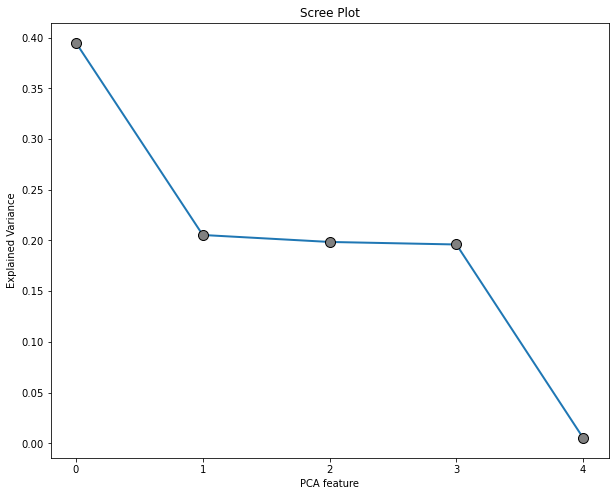

In [128]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(continuous_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

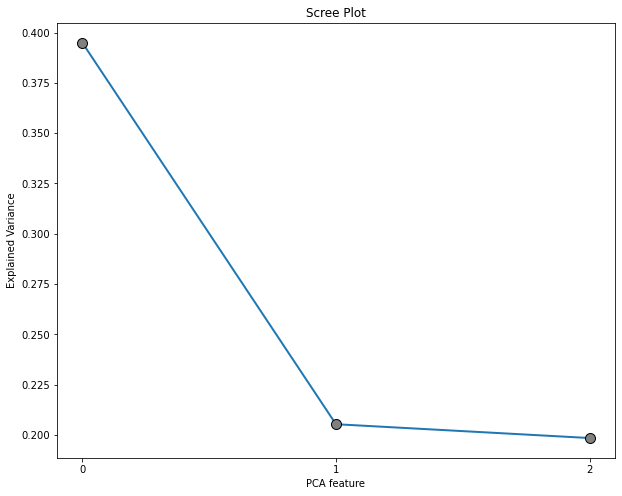

In [202]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 3,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(continuous_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [178]:
pca.components_

array([[ 2.31308004e-02,  1.16101962e-04, -1.22096797e-02,
         7.06861511e-01,  7.06868220e-01],
       [ 6.30438732e-01,  4.71099104e-01,  6.16895322e-01,
        -6.09427732e-03, -3.95737646e-03],
       [ 2.61135628e-01, -8.77164678e-01,  4.02975275e-01,
        -1.03771383e-03, -4.02785897e-04],
       [-7.30629272e-01,  9.29926985e-02,  6.75944265e-01,
         1.77269711e-02,  1.78417875e-02]])

In [203]:
pca.explained_variance_ratio_.sum()

0.7988086342171687

In [204]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(continuous_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}""")


MAX Components Factor Loadings
------------------------------
                                 0     1     2
completed_years_of_education  0.02  0.63  0.26
age                           0.00  0.47 -0.88
number_of_orders             -0.01  0.62  0.40
avg_quantity                  0.71 -0.01 -0.00
avd_spent                     0.71 -0.00 -0.00


In [205]:
# naming each principal component
factor_loadings.columns = ['Premium_wholesaler',  # high quantity, high price
                           'Premium_retailer',    # high frequency, medium quantity, longevity of business
                           'Individual_retailer'] # young people, decent orders
#                           'Standard_retailer']   # high frequency, medium quantity, longevity risk 
#                           'Standard_wholesaler'] # high quantity, low price
                            

# checking the result
factor_loadings

,Premium_wholesaler,Premium_retailer,Individual_retailer
completed_years_of_education,0.023131,0.630439,0.261136
age,0.000116,0.471099,-0.877165
number_of_orders,-0.012210,0.616895,0.402975
avg_quantity,0.706862,-0.006094,-0.001038
avd_spent,0.706868,-0.003957,-0.000403


In [183]:
# analyzing factor strengths per customer
factor_loadings_df = pca.transform(continuous_scaled)

# converting to a DataFrame
factor_loadings_df = pd.DataFrame(factor_loadings_df)


# renaming columns
factor_loadings_df.columns = factor_loadings.columns


# checking the results
factor_loadings_df.head(n = 5)

,Premium_wholesaler,Premium_retailer,Individual_retailer,Standard_retailer
0,-0.005563,0.906495,-0.362044,-0.918620
1,-0.005633,0.948003,0.011631,-0.749253
2,-0.026928,1.988665,0.691421,0.390998
3,-0.089765,-1.432363,-1.183976,1.604585
4,-0.027872,-0.127134,-0.973761,0.120254


In [184]:
# checking variance amongst clusters
np.var(factor_loadings_df)

Premium_wholesaler     1.974734
Premium_retailer       1.026820
Individual_retailer    0.992489
Standard_retailer      0.980016
dtype: float64

In [185]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(df = factor_loadings_df)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df), '\n\n')
print(np.var(pca_scaled))

Premium_wholesaler     1.974734
Premium_retailer       1.026820
Individual_retailer    0.992489
Standard_retailer      0.980016
dtype: float64 


Premium_wholesaler     1.0
Premium_retailer       1.0
Individual_retailer    1.0
Standard_retailer      1.0
dtype: float64


In [188]:
# INSTANTIATING a k-Means object with three clusters
customers_k_pca = KMeans(n_clusters   = 3,
                        random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    2289
0    1765
2       1
Name: Cluster, dtype: int64


In [142]:
#df_labeled = final_df.loc[~final_df['type_of_client'].isnull(), : ]
#df_labeled['new_class'] = df_labeled['type_of_client'] + df_labeled['cluster_kmeans'].astype(str)
#df_labeled['new_class'].value_counts()

In [189]:
customers_kmeans_pca.value_counts()

Cluster
1          2289
0          1765
2             1
dtype: int64

In [190]:
customer_df.columns

Index(['customer_id', 'occupation', 'employment_type', 'education', 'completed_years_of_education', 'marital_status', 'relationship_in_household', 'race', 'country', 'avg_quantity', 'total_quantity', 'avd_spent', 'total_spent', 'number_of_orders', 'age', 'type_of_client'], dtype='object')

In [192]:
# concatenating categorical information with pca patterns
final_df = pd.concat([customer_df.loc[ : , ['customer_id', 'occupation', 'employment_type', 'education',
                                             'marital_status', 'relationship_in_household', 'race', 
                                             'country', 'age', 'type_of_client']],
                                            factor_loadings_df.round(decimals = 2),
                                            customers_kmeans_pca],
                                            axis = 1)


# renaming columns
final_df.columns = ['customer_id', 'occupation', 'employment_type', 'education', 'marital_status', 
                    'relationship_in_household', 'race', 'country', 'age', 'type_of_client',
                    'Premium_wholesaler', 'Premium_retailer', 'Individual_retailer',   
                    'Standard_retailer', 'cluster_kmeans']

# converting to a DataFrame
final_df = pd.DataFrame(final_df)


# checking the results
final_df.head(n = 10)

,customer_id,occupation,employment_type,education,marital_status,relationship_in_household,race,country,age,type_of_client,Premium_wholesaler,Premium_retailer,Individual_retailer,Standard_retailer,cluster_kmeans
0,1144084,Sales,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,White,United-States,48,NaN,-0.01,0.91,-0.36,-0.92,0
1,1504001,Exec-managerial,Private,Bachelors,Married-civ-spouse,Husband,White,United-States,44,NaN,-0.01,0.95,0.01,-0.75,0
2,1525178,Exec-managerial,Private,Bachelors,Married-civ-spouse,Husband,White,United-States,44,Wholesaler,-0.03,1.99,0.69,0.39,0
3,1773036,Machine-op-inspct,Private,7th-8th,Divorced,Not-in-family,White,United-States,46,Personal,-0.09,-1.43,-1.18,1.60,0
4,2276568,Adm-clerical,Private,HS-grad,Married-civ-spouse,Wife,White,United-States,50,NaN,-0.03,-0.13,-0.97,0.12,0
5,2923460,Craft-repair,Self-emp-inc,HS-grad,Married-civ-spouse,Husband,White,United-States,33,NaN,-0.04,-0.36,0.34,0.39,1
6,3231630,Sales,Private,Some-college,Married-civ-spouse,Husband,White,United-States,43,Wholesaler,0.01,-0.12,-0.42,-0.21,0
7,3247076,Machine-op-inspct,Private,HS-grad,Never-married,Unmarried,Black,United-States,26,Wholesaler,-0.04,-0.85,0.63,0.07,1
8,3928504,Sales,Private,Some-college,Never-married,Not-in-family,White,United-States,21,NaN,-0.03,-0.88,0.98,-0.37,1
9,4868589,Adm-clerical,Private,HS-grad,Never-married,Not-in-family,White,United-States,25,NaN,-0.04,-0.99,0.63,-0.05,1


In [193]:
final_df.groupby(['cluster_kmeans']).describe()

customer_id                                                                                                       age                                                    Premium_wholesaler                                                         Premium_retailer                                                    Individual_retailer                                                    Standard_retailer                                                   
                     count          mean           std           min           25%           50%           75%           max   count       mean       std   min   25%   50%   75%   max              count       mean       std    min    25%    50%    75%    max            count      mean       std   min   25%   50%   75%    max               count      mean       std   min   25%   50%   75%    max             count      mean       std   min   25%   50%   75%    max
cluster_kmeans                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
0                   1765.0  2.123025e+09  1.258864e+09  1.144084e+06  1.018245e+09  2.117853e+09  3.227294e+09  4.293417e+09  1765.0  51.818130  9.127549  29.0  45.0  50.0  57.0  91.0             1765.0  -0.015796  0.243799  -0.96  -0.04  -0.03  -0.01   7.44           1765.0  0.511677  1.080942 -2.09 -0.02  0.41  0.95  21.58              1765.0 -0.786221  0.918193 -3.70 -1.26 -0.71 -0.31  13.92            1765.0  0.081677  1.205625 -1.92 -0.73  0.12  0.46  22.01
1                   2289.0  2.152586e+09  1.247603e+09  2.923460e+06  1.081041e+09  2.159233e+09  3.246634e+09  4.293605e+09  2289.0  29.088685  6.499899  17.0  24.0  29.0  35.0  42.0             2289.0  -0.026326  0.150968  -5.60  -0.04  -0.03  -0.01   1.51           2289.0 -0.394539  0.749177 -2.71 -0.83 -0.49  0.10   4.73              2289.0  0.606308  0.514297 -1.07  0.24  0.63  0.98   3.70            2289.0 -0.063512  0.778690 -2.04 -0.46 -0.04  0.23   5.51
2                      1.0  2.137914e+09           NaN  2.137914e+09  2.137914e+09  2.137914e+09  2.137914e+09  2.137914e+09     1.0  39.000000       NaN  39.0  39.0  39.0  39.0  39.0                1.0  88.590000       NaN  88.59  88.59  88.59  88.59  88.59              1.0 -0.160000       NaN -0.16 -0.16 -0.16 -0.16  -0.16                 1.0  0.040000       NaN  0.04  0.04  0.04  0.04   0.04               1.0  1.110000       NaN  1.11  1.11  1.11  1.11   1.11

In [206]:
cluster_0 = final_df[final_df['cluster_kmeans']==2]
cluster_0.describe()

,customer_id,age,Premium_wholesaler,Premium_retailer,Individual_retailer,Standard_retailer,cluster_kmeans
count,1.000000e+00,1.0,1.00,1.00,1.00,1.00,1.0
mean,2.137914e+09,39.0,88.59,-0.16,0.04,1.11,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.137914e+09,39.0,88.59,-0.16,0.04,1.11,2.0
25%,2.137914e+09,39.0,88.59,-0.16,0.04,1.11,2.0
50%,2.137914e+09,39.0,88.59,-0.16,0.04,1.11,2.0
75%,2.137914e+09,39.0,88.59,-0.16,0.04,1.11,2.0
max,2.137914e+09,39.0,88.59,-0.16,0.04,1.11,2.0


In [151]:
final_df['cluster_kmeans'].value_counts()

0    1740
1    1161
4    1151
2       2
3       1
Name: cluster_kmeans, dtype: int64

In [157]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ['Premium_wholesaler',
                           'Premium_retailer',
                           'Individual_retailer',
                           'Standard_retailer',
                           'Standard_wholesaler']


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Premium_wholesaler,Premium_retailer,Individual_retailer,Standard_retailer,Standard_wholesaler
0,-0.02,-0.66,0.54,0.22,-0.02
1,-0.02,0.21,-1.05,0.59,-0.04
2,0.66,-0.38,-0.26,-0.08,40.41
3,63.04,-0.16,0.04,1.12,-0.72
4,0.00,0.79,0.25,-0.93,-0.00


In [161]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "cluster_kmeans"][final_df.loc[ : , "cluster_kmeans"] == 0]) /
       len(final_df), ndigits = 2)}


Centroids
---------
{centroids_pca_df.loc[ 0 , :].to_string(dtype = False, name = False)}


occupation
-------
{final_df.loc[ : , "occupation"][ final_df.loc[ : , 'cluster_kmeans' ] == 0]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  
education
------
{final_df.loc[ : , "education"][ final_df.loc[ : , 'cluster_kmeans' ] == 0]

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
""")

 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
0.43


Centroids
---------
Premium_wholesaler    -0.02
Premium_retailer      -0.66
Individual_retailer    0.54
Standard_retailer      0.22
Standard_wholesaler   -0.02


occupation
-------
Adm-clerical         0.13
Armed-Forces         0.00
Craft-repair         0.14
Exec-managerial      0.06
Farming-fishing      0.03
Handlers-cleaners    0.07
Machine-op-inspct    0.08
Other-service        0.15
Priv-house-serv      0.00
Prof-specialty       0.03
Protective-serv      0.02
Sales                0.12
Tech-support         0.03
Transport-moving     0.06
Unknown              0.08
  
  
education
------
10th            0.04
11th            0.07
12th            0.02
1st-4th         0.00
5th-6th         0.01
7th-8th         0.02
9th             0.02
Assoc-acdm      0.00
Assoc-voc       0.04
HS-grad         0.43
Preschool       0.00
Some-college    0.36



In [ ]:
###############################################################################################################

In [66]:
# creating dummies variables 
final_df_dummies = pd.get_dummies(final_df)
 

# Creating dummy variables and adding a new column to verify if it is labeled or not 
final_df_dummies['Label'] = np.where((final_df_dummies['type_of_client_Personal'] + 
                                      final_df_dummies['type_of_client_Wholesaler']) == 0, 'F', 'T')


 # checking the data
final_df_dummies.head(n=5)

,customer_id,age,high_quantity_high_spent,senior_people_low_education,senior_people_high_education,low_quantity_high_spent,cluster_kmeans,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia,type_of_client_Personal,type_of_client_Wholesaler,Label
0,1144084,48,-0.18,1.28,-0.35,-0.02,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,F
1,1504001,43,0.01,1.02,-0.60,0.03,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,F
2,1525178,44,0.78,1.07,-0.53,0.20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,T
3,1773036,45,-0.29,-1.37,2.00,-0.01,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,T
4,2276568,50,-0.25,0.28,0.87,-0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,F


In [67]:
# Not Labeled data
nolabel_final_dummies = final_df_dummies[final_df_dummies['Label'] == 'F']

# Dropping varibles that are not needed
nolabel_final_dummies = nolabel_final_dummies.drop(['type_of_client_Personal','type_of_client_Wholesaler',
                                                    'Label', 'cluster_kmeans', 'customer_id'],
                                                     axis = 1)

# checking the final dataset
nolabel_final_dummies.head(n = 5)

,age,high_quantity_high_spent,senior_people_low_education,senior_people_high_education,low_quantity_high_spent,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown,employment_type_Federal-gov,employment_type_Local-gov,employment_type_Private,employment_type_Self-emp-inc,employment_type_Self-emp-not-inc,employment_type_State-gov,employment_type_Unknown,employment_type_Without-pay,education_10th,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital_status_Divorced,marital_status_Married-AF-spouse,marital_status_Married-civ-spouse,marital_status_Married-spouse-absent,marital_status_Never-married,marital_status_Separated,marital_status_Widowed,relationship_in_household_Husband,relationship_in_household_Not-in-family,relationship_in_household_Other-relative,relationship_in_household_Own-child,relationship_in_household_Unmarried,relationship_in_household_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,country_Cambodia,country_Canada,country_China,country_Columbia,country_Cuba,country_Dominican-Republic,country_Ecuador,country_El-Salvador,country_England,country_France,country_Germany,country_Greece,country_Guatemala,country_Haiti,country_Honduras,country_Hong,country_India,country_Iran,country_Ireland,country_Italy,country_Jamaica,country_Japan,country_Laos,country_Mexico,country_Nicaragua,country_Outlying-US(Guam-USVI-etc),country_Peru,country_Philippines,country_Poland,country_Portugal,country_Puerto-Rico,country_Scotland,country_South,country_Taiwan,country_Thailand,country_Trinadad&Tobago,country_United-States,country_Unknown,country_Vietnam,country_Yugoslavia
0,48,-0.18,1.28,-0.35,-0.02,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,43,0.01,1.02,-0.60,0.03,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,50,-0.25,0.28,0.87,-0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,33,-0.00,-0.60,-0.01,0.05,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,21,-0.23,-0.95,-0.91,-0.01,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [68]:
# Labeled data
label_final_dummies = final_df_dummies[final_df_dummies['Label'] == 'T']


# create new classes
label_final_dummies['new_class'] = label_final_dummies['type_of_client_Personal'].astype(str) + label_final_dummies['cluster_kmeans'].astype(str)


# drop unneeded columns
label_final_dummies = label_final_dummies.drop(['type_of_client_Personal', 'type_of_client_Wholesaler', 'cluster_kmeans', 'Label'], axis = 1)


# check labeled dataset
label_final_dummies.head(n = 5)


# create data and target for labeled dataset
label_final_data = label_final_dummies.drop('new_class', axis = 1)
label_final_target = label_final_dummies.loc[ : , 'new_class']

/var/folders/d8/_jrpdn5s1x57cvk6wx8v7kyw0000gn/T/ipykernel_799/2557897268.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_final_dummies['new_class'] = label_final_dummies['type_of_client_Personal'].astype(str) + label_final_dummies['cluster_kmeans'].astype(str)


In [69]:
# creating the testing and training dataset
X_train, X_test, y_train, y_test = train_test_split(
    label_final_data,
    label_final_target,
    test_size = 0.25, 
    random_state = 219)

# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {X_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {X_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (765, 103)
y-side: (765,)


Testing Data
------------
X-side: (256, 103)
y-side: (256,)



In [80]:
# K-NN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# initiating the model
knn = KNeighborsClassifier(n_neighbors = 9)

# fitting the model with the training data
knn.fit(X_train, y_train)

# predicting using testing data
y_pred = knn.predict(X_test)

# Printing the classification report
print(classification_report(y_test, y_pred))

# unpacking the confusion matrix
confusion_matrix(y_true = y_test, y_pred = y_pred)




              precision    recall  f1-score   support

          00       0.37      0.48      0.42        94
          01       0.47      0.52      0.50       119
          10       0.00      0.00      0.00        19
          11       0.00      0.00      0.00        24

    accuracy                           0.42       256
   macro avg       0.21      0.25      0.23       256
weighted avg       0.36      0.42      0.38       256



array([[45, 49,  0,  0],
       [54, 62,  1,  2],
       [10,  9,  0,  0],
       [13, 11,  0,  0]])

Text(0.5, 1.0, 'Confusion Matrix Testing Data')

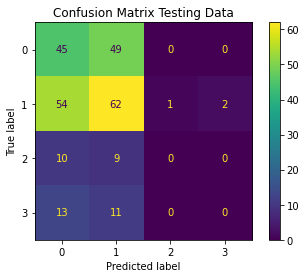

In [81]:
# Confusion matrix for K-NN on testing data
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm)
cmd.plot()
cmd.ax_.set_title('Confusion Matrix Testing Data')